In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
plt.show()

In [2]:
df= pd .read_csv('Airbnb_Open_Data.csv')
df.head(10)

/var/folders/kt/w2tnp7fd53b85rxnn34tkb940000gn/T/ipykernel_10446/154860406.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd .read_csv('Airbnb_Open_Data.csv')


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0,"No smoking, please, and no drugs.",NaN
6,1004650,BlissArtsSpace!,61300605564,NaN,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2015.0,$71,$14,45.0,49.0,10/5/2017,0.40,5.0,1.0,224.0,Please no shoes in the house so bring slippers...,NaN
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,"$1,060",$212,45.0,49.0,10/5/2017,0.40,5.0,1.0,219.0,House Guidelines for our BnB We are delighted ...,NaN
8,1005754,Large Furnished Room Near B'way,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,True,strict,Private room,2005.0,"$1,018",$204,2.0,430.0,6/24/2019,3.47,3.0,1.0,180.0,- Please clean up after yourself when using th...,NaN
9,1006307,Cozy Clean Guest Room - Family Apt,75527839483,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,United States,US,False,strict,Private room,2015.0,$291,$58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0,NO SMOKING OR PETS ANYWHERE ON THE PROPERTY 1....,NaN


In [3]:
df = df.replace(" ","",regex=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
#missing values in some of the column
#need to change the Data types of some of the columns


Data Cleaning


In [6]:
#find out duplicate values in the Dataset
df.duplicated().sum()

541

In [7]:
#first we need to drop the duplicate rows to make the analysis more precise
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
#drop unwanted columns for analysis

In [9]:
df.drop(["id","NAME","host id","license","house_rules","country","country code"],axis=1,inplace=True)

In [10]:
df.head(3)

,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Privateroom,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entirehome/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Privateroom,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0


In [11]:
#find out missing values in the dataset
df.isnull().sum()


host_identity_verified              289
host name                           404
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      400
number of reviews                   183
last review                       15832
reviews per month                 15818
review rate number                  319
calculated host listings count      319
availability 365                    448
dtype: int64

In [12]:
df['review_year']= pd.to_datetime(df['last review'])
df.drop('last review',axis=1,inplace=True)

In [13]:
df.review_year.isna().sum()

15832

In [14]:
#replace not given Year with value 0 as we do not know the value and it is the best way

In [15]:
df.review_year.fillna(0,inplace=True)

In [16]:
#working review per month null values.
df['reviews per month'].isna().sum()

15818

In [17]:
df['reviews per month'].fillna(df['reviews per month'].mean(),inplace=True)

In [18]:
df['reviews per month']

0         0.210000
1         0.380000
2         1.375408
3         4.640000
4         0.100000
            ...   
102053    0.440000
102054    0.720000
102055    3.120000
102056    1.375408
102057    0.850000
Name: reviews per month, Length: 102058, dtype: float64

In [19]:
df['availability 365'].isna().sum()

#Availability values null means it was not available for whole year.


448

In [20]:
df['availability 365'].fillna(0,inplace=True)

In [21]:
df.isna().sum()

host_identity_verified            289
host name                         404
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                             247
service fee                       273
minimum nights                    400
number of reviews                 183
reviews per month                   0
review rate number                319
calculated host listings count    319
availability 365                    0
review_year                         0
dtype: int64

/Users/leo_mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number of reviews', ylabel='Density'>

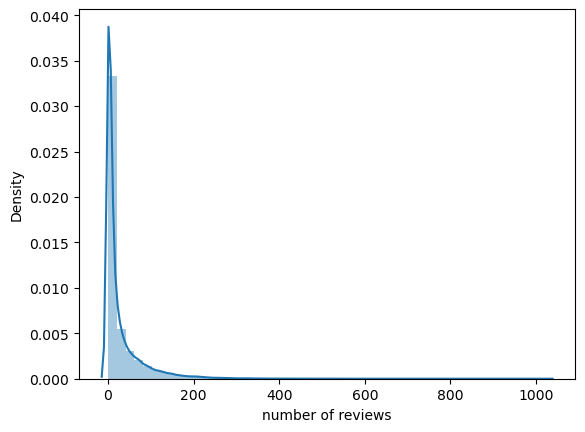

In [22]:
sns.distplot(df['number of reviews'])

In [23]:
#working with null values in number of reviews column
df[df['number of reviews'].isna()]

,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,review_year
97,verified,Sydney,Manhattan,UpperWestSide,40.79764,-73.96177,True,strict,Entirehome/apt,2017.0,$343,$69,NaN,NaN,0.71,NaN,1.0,55.0,2019-07-07 00:00:00
141,verified,Martin,Brooklyn,Greenpoint,40.73409,-73.95348,False,moderate,Entirehome/apt,2016.0,$488,$98,NaN,NaN,0.03,4.0,1.0,325.0,0
566,unconfirmed,Alisa,Manhattan,EastVillage,40.72956,-73.97903,False,strict,Entirehome/apt,2007.0,$844,$169,1.0,NaN,0.65,3.0,1.0,85.0,2019-07-01 00:00:00
1066,verified,Sharma,Queens,JacksonHeights,40.74906,-73.89377,True,flexible,Privateroom,NaN,$399,$80,7.0,NaN,0.64,5.0,3.0,126.0,2018-09-30 00:00:00
1591,verified,Ellen,Manhattan,UpperWestSide,40.79241,-73.97111,False,strict,Entirehome/apt,2021.0,$564,$113,3.0,NaN,0.43,5.0,1.0,194.0,2018-09-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91027,unconfirmed,Eunice,Manhattan,Chelsea,40.74089,-74.00002,False,strict,Entirehome/apt,2021.0,$695,$139,2.0,NaN,0.13,1.0,1.0,0.0,2019-01-01 00:00:00
91831,unconfirmed,Vladimir,Manhattan,UpperEastSide,40.76830,-73.95919,False,moderate,Entirehome/apt,2003.0,$151,$30,4.0,NaN,1.33,1.0,1.0,4.0,2019-06-25 00:00:00
99736,unconfirmed,Naveen,Brooklyn,Williamsburg,40.71365,-73.96232,True,flexible,Privateroom,2022.0,$546,$109,3.0,NaN,0.38,1.0,1.0,188.0,2018-10-10 00:00:00
100590,unconfirmed,Andrea,Manhattan,LowerEastSide,40.71833,-73.98556,True,strict,Privateroom,2015.0,$671,$134,4.0,NaN,0.63,4.0,2.0,244.0,2019-06-25 00:00:00


In [24]:
df['number of reviews'].mode()

0    0.0
Name: number of reviews, dtype: float64

In [25]:
#as number of review not given for some rows we can assume that number of review is 0 for this rows which is also mode for this column
df['number of reviews'].fillna(0,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          101769 non-null  object 
 1   host name                       101654 non-null  object 
 2   neighbourhood group             102029 non-null  object 
 3   neighbourhood                   102042 non-null  object 
 4   lat                             102050 non-null  float64
 5   long                            102050 non-null  float64
 6   instant_bookable                101953 non-null  object 
 7   cancellation_policy             101982 non-null  object 
 8   room type                       102058 non-null  object 
 9   Construction year               101844 non-null  float64
 10  price                           101811 non-null  object 
 11  service fee                     101785 non-null  object 
 12  minimum nights  

as we can see service fee and price column has object data type 
i need to change the data type to numaric and remove the string $ from there

In [27]:
df["service fee"] = df["service fee"].str.replace("$","",regex=True)
df["service fee"]=df["service fee"].astype('float')
df["service fee"].isnull().sum()

273

/Users/leo_mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='service fee', ylabel='Density'>

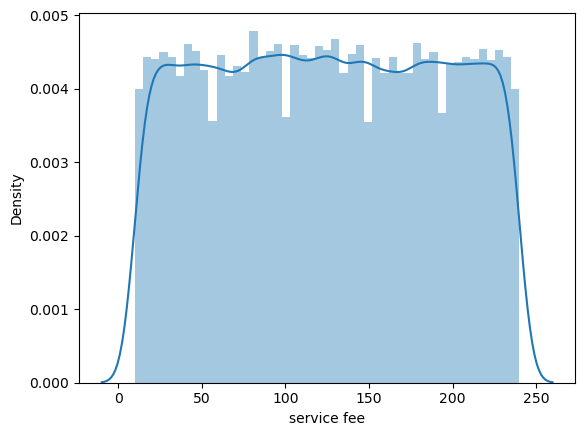

In [28]:
#Checking outlier in service fee
sns.distplot(df["service fee"])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 102057
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          101769 non-null  object 
 1   host name                       101654 non-null  object 
 2   neighbourhood group             102029 non-null  object 
 3   neighbourhood                   102042 non-null  object 
 4   lat                             102050 non-null  float64
 5   long                            102050 non-null  float64
 6   instant_bookable                101953 non-null  object 
 7   cancellation_policy             101982 non-null  object 
 8   room type                       102058 non-null  object 
 9   Construction year               101844 non-null  float64
 10  price                           101811 non-null  object 
 11  service fee                     101785 non-null  float64
 12  minimum nights  

In [30]:
#. NO outliers spotted.
#most of the hotel has almost same ammount of service fees so we can fill the null with mean values.
df['service fee'].fillna(df['service fee'].mean(),inplace=True)

In [31]:
df["price"] = df["price"].str.replace("$","",regex=True)
df["price"] = df["price"].str.replace(",","",regex=True)
df["price"]=df["price"].astype('float')
df["price"].isnull().sum()

247

/Users/leo_mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

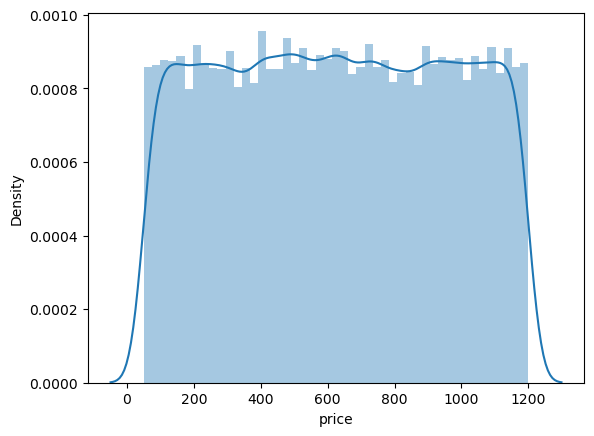

In [32]:
#check for outliers.
sns.distplot(df['price'])

In [33]:
#No outliers spotted
df['price'].fillna(df['price'].mean(),inplace=True)
df.isna().sum()

host_identity_verified            289
host name                         404
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                               0
service fee                         0
minimum nights                    400
number of reviews                   0
reviews per month                   0
review rate number                319
calculated host listings count    319
availability 365                    0
review_year                         0
dtype: int64

/Users/leo_mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='availability 365', ylabel='Density'>

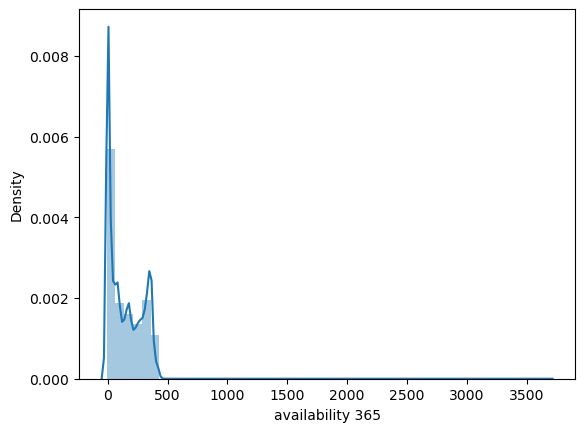

In [34]:
sns.distplot(df['availability 365'])

In [35]:
df

,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,review_year
0,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Privateroom,2020.0,966.0,193.000000,10.0,9.0,0.210000,4.0,6.0,286.0,2021-10-19 00:00:00
1,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entirehome/apt,2007.0,142.0,28.000000,30.0,45.0,0.380000,4.0,2.0,228.0,2022-05-21 00:00:00
2,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Privateroom,2005.0,620.0,124.000000,3.0,0.0,1.375408,5.0,1.0,352.0,0
3,unconfirmed,Garry,Brooklyn,ClintonHill,40.68514,-73.95976,True,moderate,Entirehome/apt,2005.0,368.0,74.000000,30.0,270.0,4.640000,4.0,1.0,322.0,2019-07-05 00:00:00
4,verified,Lyndon,Manhattan,EastHarlem,40.79851,-73.94399,False,moderate,Entirehome/apt,2009.0,204.0,41.000000,10.0,9.0,0.100000,3.0,1.0,289.0,2018-11-19 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,True,moderate,Privateroom,NaN,696.0,125.039249,7.0,12.0,0.440000,5.0,1.0,0.0,2019-03-27 00:00:00
102054,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,False,flexible,Privateroom,NaN,909.0,125.039249,1.0,19.0,0.720000,3.0,2.0,0.0,2017-08-31 00:00:00
102055,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,True,moderate,Entirehome/apt,NaN,387.0,125.039249,2.0,50.0,3.120000,4.0,2.0,235.0,2019-06-26 00:00:00
102056,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,True,strict,Privateroom,NaN,848.0,125.039249,2.0,0.0,1.375408,1.0,1.0,0.0,0


In [36]:
#There are some negative values in availability 365 columns which is not possible.
#It can be count as a outliers

In [37]:
df.drop(df[df['availability 365']<0].index,inplace=True)

#outliers removed
df.isna().sum()


host_identity_verified            287
host name                         404
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
instant_bookable                  104
cancellation_policy                75
room type                           0
Construction year                 210
price                               0
service fee                         0
minimum nights                    394
number of reviews                   0
reviews per month                   0
review rate number                318
calculated host listings count    316
availability 365                    0
review_year                         0
dtype: int64

In [38]:
df["host_identity_verified"].value_counts()

unconfirmed    50721
verified       50619
Name: host_identity_verified, dtype: int64

In [39]:
df["host_identity_verified"].fillna( method ='ffill', inplace = True)

In [40]:
df.drop(['instant_bookable'],axis=1,inplace=True)

In [41]:
df["cancellation_policy"].fillna( method ='ffill', inplace = True)

In [42]:
df.isna().sum()

host_identity_verified              0
host name                         404
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
cancellation_policy                 0
room type                           0
Construction year                 210
price                               0
service fee                         0
minimum nights                    394
number of reviews                   0
reviews per month                   0
review rate number                318
calculated host listings count    316
availability 365                    0
review_year                         0
dtype: int64

From the values here i found that some of the columns contain outliers. from max values and mean values comparison i can see that there is a huge difference between both values. Mean is very much sensitive to outliers 
For example Column minimum nights max values 5645 but mean is 8.13. Like this there are three columns availability 365, minimum nights.

In [43]:
df[df['availability 365']>500]

,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,review_year
70866,verified,Laura,Manhattan,Harlem,40.81623,-73.94907,strict,Entirehome/apt,2009.0,1186.0,237.0,3.0,232.0,3.22,5.0,1.0,3677.0,2019-06-13 00:00:00


In [44]:
df.drop(df[df['availability 365']>500].index,inplace=True)

##outlier removed for availability 365 column.

In [45]:
df.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,101618.000000,101618.000000,101416.000000,101626.000000,101626.000000,101232.000000,101626.000000,101626.000000,101308.000000,101310.000000,101626.000000
mean,40.728085,-73.949608,2012.489785,625.449584,125.058338,8.130621,27.416419,1.376672,3.279968,7.949304,141.008679
std,0.055869,0.049540,5.765092,331.262176,66.235471,30.651076,49.453765,1.607917,1.284230,32.315801,134.951084
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,0.000000
25%,40.688720,-73.982560,2007.000000,341.000000,68.000000,2.000000,1.000000,0.280000,2.000000,1.000000,3.000000
50%,40.722270,-73.954430,2012.000000,625.355580,125.000000,3.000000,7.000000,1.050000,3.000000,1.000000,96.000000
75%,40.762760,-73.932320,2017.000000,912.000000,182.000000,5.000000,30.000000,1.710000,4.000000,2.000000,268.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


In [46]:
df[df['minimum nights']>1000]


,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,review_year
350,verified,Russell,Brooklyn,CrownHeights,40.67473,-73.94494,flexible,Entirehome/apt,2003.0,1142.0,228.0,3455.0,0.0,1.375408,1.0,1.0,0.0,0
5768,verified,Genevieve,Manhattan,GreenwichVillage,40.73293,-73.99782,moderate,Entirehome/apt,2008.0,379.0,76.0,1250.0,2.0,0.030000,2.0,1.0,26.0,2014-11-09 00:00:00
42398,verified,Elena,Brooklyn,Bushwick,40.70235,-73.92892,flexible,Privateroom,2013.0,453.0,91.0,5645.0,1.0,0.880000,4.0,1.0,0.0,2019-06-05 00:00:00
42407,unconfirmed,Gk,Brooklyn,BayRidge,40.63189,-74.02322,moderate,Entirehome/apt,2022.0,843.0,169.0,2645.0,14.0,3.590000,3.0,1.0,271.0,2019-06-14 00:00:00


In [47]:
df.drop(df[df['minimum nights']>1000].index,inplace=True)

In [48]:
df.isna().sum()

host_identity_verified              0
host name                         404
neighbourhood group                29
neighbourhood                      16
lat                                 8
long                                8
cancellation_policy                 0
room type                           0
Construction year                 210
price                               0
service fee                         0
minimum nights                    394
number of reviews                   0
reviews per month                   0
review rate number                318
calculated host listings count    316
availability 365                    0
review_year                         0
dtype: int64

In [49]:
df['host name'].fillna("other",inplace=True)


In [50]:
df[df['neighbourhood group'].isna()]

##percentage of null rows in the column
df['neighbourhood group'].isna().sum()*100/len(df)

0.028537127787290152

only 0.02% of data of neighbourhood group contain null values so we can drop it as outliers

In [51]:
df.dropna(subset=['neighbourhood group'],inplace=True)


#percentage of null values in the neighbourhood column is very very low tha is why we can remove this rows also

In [52]:
df.dropna(subset=['neighbourhood'],inplace=True)


In [53]:
df['calculated host listings count'].fillna(df['calculated host listings count'].mean(),inplace=True)

In [54]:
df['Construction year'].fillna('Not_known',inplace=True)

In [55]:
df['minimum nights'].fillna(df['minimum nights'].mean(),inplace=True)

In [56]:
df

,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,review_year
0,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,strict,Privateroom,2020.0,966.0,193.000000,10.0,9.0,0.210000,4.0,6.0,286.0,2021-10-19 00:00:00
1,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,moderate,Entirehome/apt,2007.0,142.0,28.000000,30.0,45.0,0.380000,4.0,2.0,228.0,2022-05-21 00:00:00
2,verified,Elise,Manhattan,Harlem,40.80902,-73.94190,flexible,Privateroom,2005.0,620.0,124.000000,3.0,0.0,1.375408,5.0,1.0,352.0,0
3,unconfirmed,Garry,Brooklyn,ClintonHill,40.68514,-73.95976,moderate,Entirehome/apt,2005.0,368.0,74.000000,30.0,270.0,4.640000,4.0,1.0,322.0,2019-07-05 00:00:00
4,verified,Lyndon,Manhattan,EastHarlem,40.79851,-73.94399,moderate,Entirehome/apt,2009.0,204.0,41.000000,10.0,9.0,0.100000,3.0,1.0,289.0,2018-11-19 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,moderate,Privateroom,Not_known,696.0,125.039249,7.0,12.0,0.440000,5.0,1.0,0.0,2019-03-27 00:00:00
102054,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,flexible,Privateroom,Not_known,909.0,125.039249,1.0,19.0,0.720000,3.0,2.0,0.0,2017-08-31 00:00:00
102055,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,moderate,Entirehome/apt,Not_known,387.0,125.039249,2.0,50.0,3.120000,4.0,2.0,235.0,2019-06-26 00:00:00
102056,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,strict,Privateroom,Not_known,848.0,125.039249,2.0,0.0,1.375408,1.0,1.0,0.0,0


<AxesSubplot:>

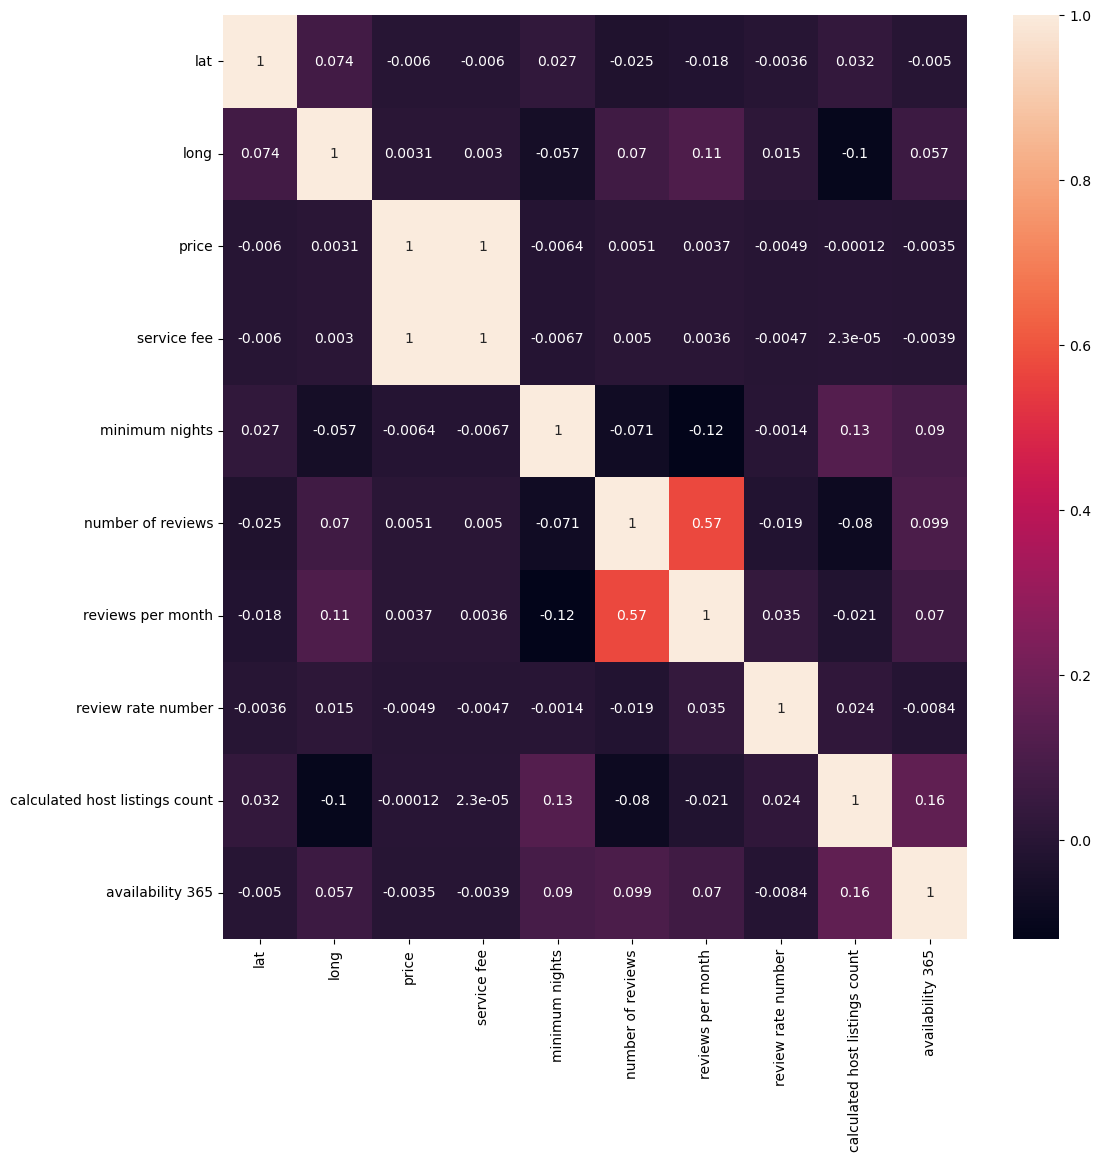

In [57]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,)

#review rate number is not strongly correlated with other columns so we can keep the column as it was before
